In [7]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 기본 테마 설정
sns.set()

# 한글 폰트 설정 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
# Mac이면 아래 줄 주석 해제: plt.rcParams['font.family'] = 'AppleGothic'

plt.rcParams['figure.figsize'] = 10, 5
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False

# 통계 라이브러리
from scipy import stats


In [8]:
df = pd.read_excel("./data/퇴사사유.xlsx", sheet_name="데이터")
df.head()



,연령구분,성별,2017.05,2017.05.1,2017.05.2,2017.05.3,2017.05.4,2017.05.5,2017.05.6,2017.05.7,...,2023.05.6,2023.05.7,2024.05,2024.05.1,2024.05.2,2024.05.3,2024.05.4,2024.05.5,2024.05.6,2024.05.7
0,연령구분,성별,이직 경험자 전체,"근로여건 불만족(보수, 근로시간 등)","개인/가족적이유(건강,육아,결혼등)",전망이 없어서,"전공, 지식, 기술, 적성등이 맞지않아서","임시적, 계절적인 일의 완료, 계약기간 끝남","직장휴업, 폐업, 파산 등",그 외,...,"직장휴업, 폐업, 파산 등",그 외,이직 경험자 전체,"근로여건 불만족(보수, 근로시간 등)","개인/가족적이유(건강,육아,결혼등)",전망이 없어서,"전공, 지식, 기술, 적성등이 맞지않아서","임시적, 계절적인 일의 완료, 계약기간 끝남","직장휴업, 폐업, 파산 등",그 외
1,15~29세,전체,2516,1284,348,180,167,303,60,175,...,55,189,2472,1125,379,190,155,385,59,179
2,NaN,남자,1113,546,120,97,78,150,28,94,...,16,81,1159,515,179,97,77,170,21,100
3,NaN,여자,1403,738,227,83,89,153,31,82,...,38,107,1313,610,200,93,78,215,38,80
4,20~34세,전체,4938,2454,781,358,338,503,140,364,...,109,339,4955,2323,781,378,350,672,119,333


In [9]:
filtered_df = df[(df['연령구분'] == '15~29세') & (df['성별'] == '전체')]


C:\Users\PC\AppData\Local\Temp\ipykernel_32840\1958043107.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=labels, y=values, palette="pastel")


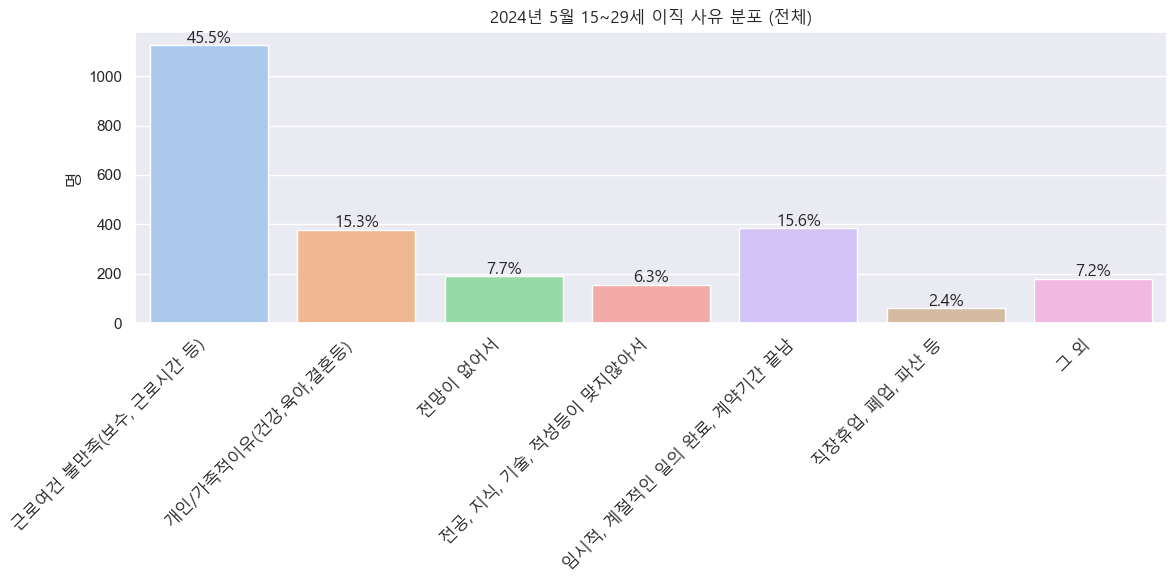

In [17]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_path)

labels = df.iloc[0, -7:].values
values = filtered_df.iloc[0, -7:].astype(int).values
total = values.sum()

sns.set()
plt.figure(figsize=(12, 6))
bars = sns.barplot(x=labels, y=values, palette="pastel")

# 퍼센트 텍스트 추가
for bar, count in zip(bars.patches, values):
    percent = count / total * 100
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    plt.text(x, y + 10, f"{percent:.1f}%", ha='center', fontproperties=fontprop)

# 축 설정
plt.xticks(rotation=45, ha='right', fontproperties=fontprop)
plt.title("2024년 5월 15~29세 이직 사유 분포 (전체)", fontproperties=fontprop)
plt.ylabel("명", fontproperties=fontprop)

# ✅ 저장은 show 전에!
plt.tight_layout()
plt.savefig("퇴사사유_그래프.png", dpi=300, bbox_inches='tight')  # 이미지로 저장
plt.show()

In [19]:
plt.savefig("퇴사사유_그래프.png", dpi=300, bbox_inches='tight')

<Figure size 1000x500 with 0 Axes>

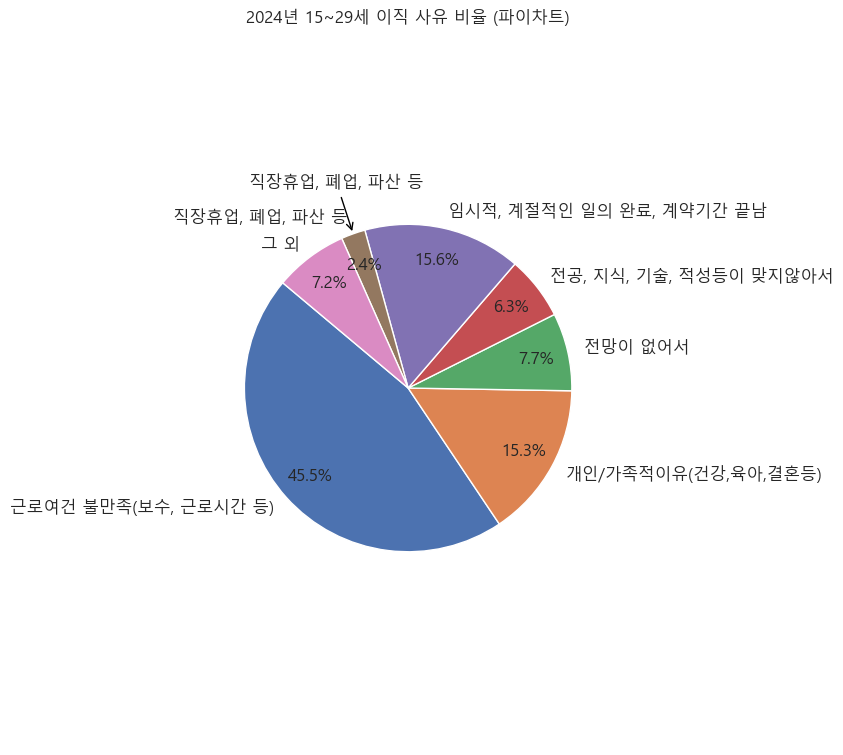

In [11]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_path)

# 데이터
labels = df.iloc[0, -7:].values
values = filtered_df.iloc[0, -7:].astype(int).values
total = values.sum()
percentages = values / total * 100

# 파이차트: 전체 퍼센트 표시
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontproperties': fontprop},
    pctdistance=0.8
)

# 전체 텍스트 한글 폰트 적용
for t in texts + autotexts:
    t.set_fontproperties(fontprop)

# 2.4% 조각만 바깥에 화살표 + 커스텀 텍스트 표시
for i, (p, w) in enumerate(zip(percentages, wedges)):
    if round(p, 1) == 2.4:
        angle = (w.theta2 + w.theta1) / 2
        x = np.cos(np.deg2rad(angle))
        y = np.sin(np.deg2rad(angle))
        x_text = 1.3 * x
        y_text = 1.3 * y

        plt.annotate(
            "직장휴업, 폐업, 파산 등",
            xy=(x, y),
            xytext=(x_text, y_text),
            arrowprops=dict(arrowstyle='->', color='black'),
            ha='center',
            fontproperties=fontprop
        )

plt.title("2024년 15~29세 이직 사유 비율 (파이차트)", fontproperties=fontprop)
plt.axis('equal')
plt.tight_layout()
plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_32840\3191293937.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=labels, y=values, palette="pastel")


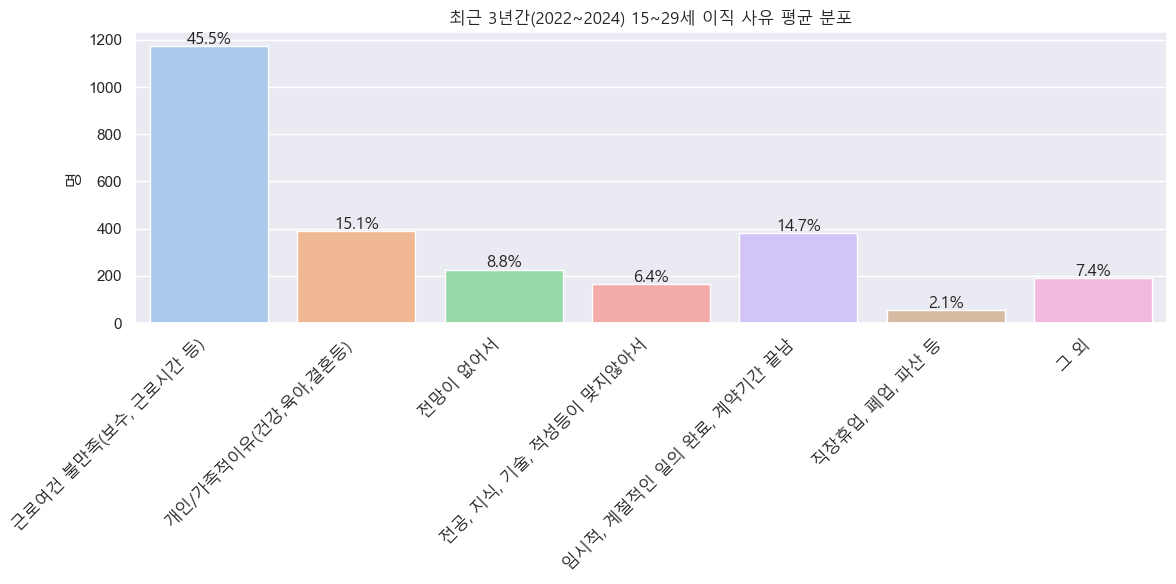

In [20]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import pandas as pd

# 📁 엑셀 데이터 불러오기
df = pd.read_excel("./data/퇴사사유.xlsx", sheet_name="데이터")
filtered_df = df[(df['연령구분'] == '15~29세') & (df['성별'] == '전체')]

# ✅ 폰트 설정 (로컬에서 100% 한글 보장)
font_path = "C:/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_path)

# ✅ 최근 3년 데이터 준비
years = ['2022.05', '2023.05', '2024.05']
columns = [f"{year}.{i}" for year in years for i in range(1, 8)]
labels = df.iloc[0][columns[:7]].values
values = filtered_df[columns].astype(int).values.reshape(3, 7).mean(axis=0)
total = values.sum()

# ✅ 그래프 그리기
sns.set()
plt.figure(figsize=(12, 6))
bars = sns.barplot(x=labels, y=values, palette="pastel")

# ✅ 막대 위 퍼센트 표기
for bar, count in zip(bars.patches, values):
    percent = count / total * 100
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    plt.text(x, y + 10, f"{percent:.1f}%", ha='center', fontproperties=fontprop)

# ✅ 한글 라벨 명시적으로 모두 폰트 지정
plt.xticks(rotation=45, ha='right', fontproperties=fontprop)
plt.title("최근 3년간(2022~2024) 15~29세 이직 사유 평균 분포", fontproperties=fontprop)
plt.ylabel("명", fontproperties=fontprop)

plt.tight_layout()
plt.savefig("recent3years_graph.png", dpi=300, bbox_inches='tight')
plt.show()
